**Tech Challenge - Fase 1 - Grupo 19**

*Previsão de custos de seguro saúde*

1 - Base de Dados

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

In [2]:
import pandas as pd
dataset = pd.read_csv("dados_simulados_50000.csv")

dataset.head()


,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,28.134756,3,não,nordeste,51161.488484
1,46,masculino,21.949898,0,não,nordeste,25170.929478
2,32,feminino,27.551341,1,não,sudeste,33984.703576
3,60,feminino,29.480087,0,não,sudoeste,45243.843529
4,25,feminino,29.568967,0,não,norte,30544.585619


In [3]:
dataset["região"].value_counts()

região
norte       12604
sudeste     12534
sudoeste    12470
nordeste    12392
Name: count, dtype: int64

In [4]:
dataset.describe()

,idade,imc,filhos,encargos
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,40.979240,26.492142,1.502440,28741.352868
std,13.528733,4.900192,1.121365,14028.695477
min,18.000000,18.000499,0.000000,2127.300730
25%,29.000000,22.223897,0.000000,16741.696734
50%,41.000000,26.525649,1.500000,28697.026728
75%,53.000000,30.748950,3.000000,40741.535341
max,64.000000,34.999865,3.000000,58111.740178


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

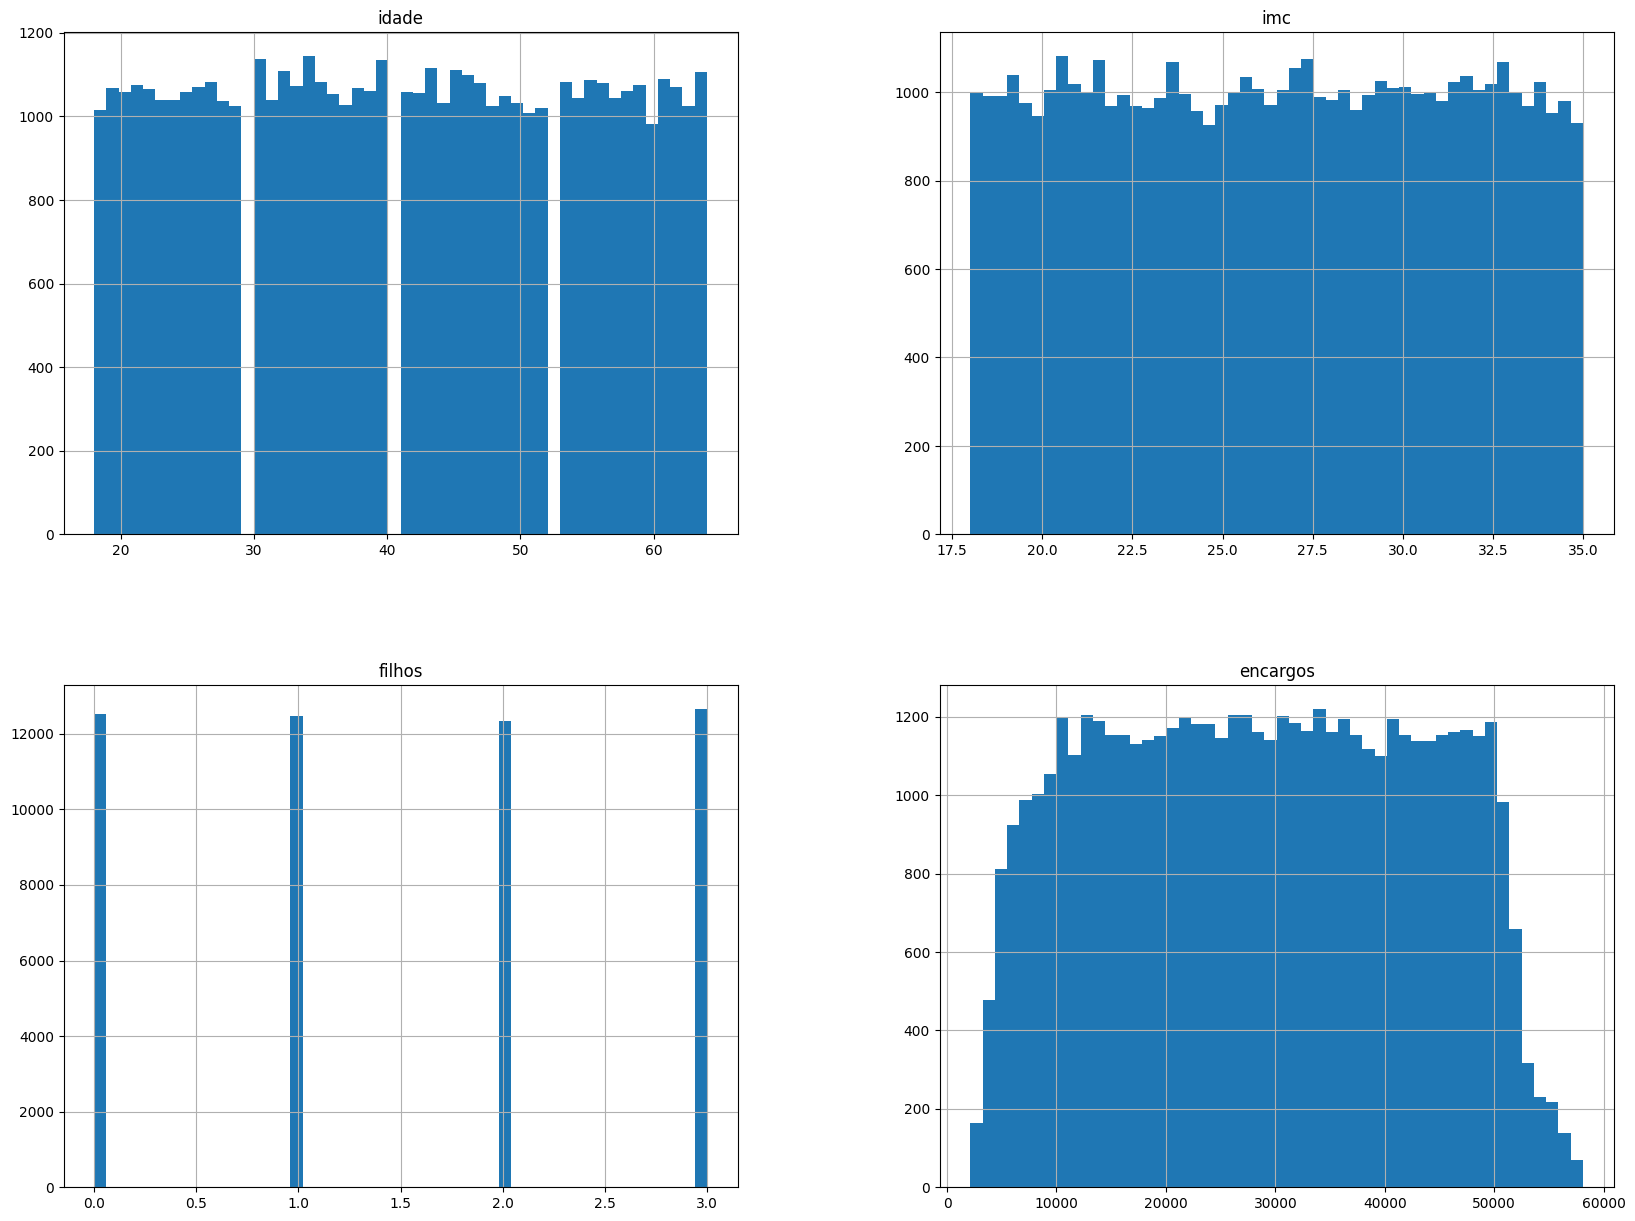

In [6]:
dataset.hist(bins=50, figsize=(20,15))

- Transformar IMC e idade em categorias

In [9]:
import numpy as np
np.random.seed(42)

dataset["faixas_imc"] = pd.cut(dataset["imc"],
                               bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

dataset["faixas_imc"].value_counts()


faixas_imc
2    18769
3    14811
4    14730
1     1434
5      256
6        0
Name: count, dtype: int64

- Transformar gênero, fumante e região em dados numéricos

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset['genero_type'] = label_encoder.fit_transform(dataset['gênero'])
dataset['fumante_type'] = label_encoder.fit_transform(dataset['fumante'])
dataset['regiao_type'] = label_encoder.fit_transform(dataset['região'])

dataset.head()

,idade,gênero,imc,filhos,fumante,região,encargos,faixas_imc,genero_type,fumante_type,regiao_type
0,56,feminino,28.134756,3,não,nordeste,51161.488484,3,0,0,0
1,46,masculino,21.949898,0,não,nordeste,25170.929478,2,1,0,0
2,32,feminino,27.551341,1,não,sudeste,33984.703576,3,0,0,2
3,60,feminino,29.480087,0,não,sudoeste,45243.843529,3,0,0,3
4,25,feminino,29.568967,0,não,norte,30544.585619,3,0,0,1


In [11]:
dataset_tratado = dataset.drop(columns = ["imc", "fumante", "região", "gênero"]).copy()

dataset_tratado.head()

,idade,filhos,encargos,faixas_imc,genero_type,fumante_type,regiao_type
0,56,3,51161.488484,3,0,0,0
1,46,0,25170.929478,2,1,0,0
2,32,1,33984.703576,3,0,0,2
3,60,0,45243.843529,3,0,0,3
4,25,0,30544.585619,3,0,0,1


In [19]:
#Separar treino e teste garantindo que ambas tem a mesma proporção de faixas de imc
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset_tratado, dataset_tratado["faixas_imc"]):
    strat_train_set = dataset_tratado.loc[train_index]
    strat_test_set = dataset_tratado.loc[test_index]

In [13]:
# Analisando as proporções
strat_test_set["faixas_imc"].value_counts() / len(strat_test_set)

faixas_imc
2    0.3754
3    0.2962
4    0.2946
1    0.0287
5    0.0051
6    0.0000
Name: count, dtype: float64

In [14]:
# Analisando as proporções
strat_train_set["faixas_imc"].value_counts() / len(strat_train_set)

faixas_imc
2    0.375375
3    0.296225
4    0.294600
1    0.028675
5    0.005125
6    0.000000
Name: count, dtype: float64

**Correlações**

In [15]:
corr_matrix = dataset_tratado.corr()
corr_matrix["encargos"].sort_values(ascending=False)

encargos        1.000000
fumante_type    0.140722
faixas_imc      0.058650
idade           0.007311
genero_type     0.006343
regiao_type    -0.002736
filhos         -0.010327
Name: encargos, dtype: float64

**Separar encargos esperados e remover do dataset de treino**

In [ ]:
custos_medicos_treino_labels = strat_train_set["encargos"].copy()
custos_medicos_treino = strat_train_set.drop(columns=['encargos'], axis=1)


In [35]:
custos_medicos_treino = strat_train_set.copy()

In [37]:
column_names = ['idade', 'filhos', 'fumante_type', 'genero_type', 'regiao_type', 'faixas_imc']

custos_medicos_dataframe = pd.DataFrame(custos_medicos_treino, columns=column_names);

print(custos_medicos_dataframe.shape)

(40000, 6)


In [34]:
strat_train_set.head()

,idade,filhos,faixas_imc,genero_type,fumante_type,regiao_type
6325,20,2,2,0,0,2
4316,55,2,4,1,1,3
34681,36,2,3,0,0,1
14114,40,0,2,1,0,1
25511,63,0,2,1,0,2


**Testando LinearRegression**

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(custos_medicos_treino, custos_medicos_treino_labels)

LinearRegression()

In [39]:
some_data = custos_medicos_treino.iloc[:5]
some_labels = custos_medicos_treino_labels.iloc[:5]

predictions = lin_reg.predict(some_data)

print("Predictions: ", predictions)

Predictions:  [26697.75122222 33739.15755702 27776.34306111 27297.55447135
 27367.23611152]


In [40]:
print("Labels: ", list(some_labels))

Labels:  [20195.231000732056, 47586.85479531949, 19869.918337770818, 12395.969118209365, 29493.838235200496]


**Avaliar modelo**

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Assuming you have the true labels in `some_labels` and the predictions in `predictions`
mse = mean_squared_error(some_labels, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(some_labels, predictions)

errors = np.abs(some_labels - predictions)
relative_errors = errors / np.abs(some_labels)
mape = np.mean(relative_errors) * 100

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('r²',r2)
print(f"O MAPE é: {mape:.2f}%")

Mean Squared Error: 104626544.51391292
Root Mean Squared Error: 10228.711771963903
r² 0.2877704043948093
O MAPE é: 45.70%


**Testando DecisionTreeRegressor**

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg.fit(custos_medicos_treino, custos_medicos_treino_labels)

DecisionTreeRegressor(max_depth=5, random_state=42)

**Avaliando Resultados**

In [46]:
some_data = custos_medicos_treino.iloc[:5]
some_labels = custos_medicos_treino_labels.iloc[:5]

predictions = tree_reg.predict(some_data)

print("Predictions: ", predictions)

Predictions:  [26858.71896448 33209.79767688 27774.17535411 26858.71896448
 28749.78296282]


In [47]:
print("Labels: ", list(some_labels))

Labels:  [20195.231000732056, 47586.85479531949, 19869.918337770818, 12395.969118209365, 29493.838235200496]


In [48]:
mse = mean_squared_error(some_labels, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(some_labels, predictions)

errors = np.abs(some_labels - predictions)
relative_errors = errors / np.abs(some_labels)
mape = np.mean(relative_errors) * 100

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('r²',r2)
print(f"O MAPE é: {mape:.2f}%")

Mean Squared Error: 104660774.71486938
Root Mean Squared Error: 10230.384876184737
r² 0.2875373874076004
O MAPE é: 44.44%
